# Neuroevolution: Optimized your Neural Network with Genetic Algorithms

## Abstract

Neuroevolution is a technique of generating and optimizing Neural Networks using Evolutionary Algorithms and it usually used for Reinforcement Learning paradigm.
Evolutionary Algorithms (EA) are based on natural evolution concepts such as reproduction, mutation, recombination, selection on posible Solution, to find the best one in the Solution Space.
EA combined with Neural Networks is a powerfull concept that will benefit all the Data Science enthusiasts. 

The talk will cover:
 - Evolutionary Algorithms basisc
 - Small Neural network as example
 - Neuroevolution examples snippets
 - Tech Stack: Python, JupyterNoteboks and Anaconda packeges
 - Demo - if time allows

## Requirements

 - NEAT-python
 - GYM
 - GYM[BOX2d]

In [ ]:
!pip install neat-python

In [ ]:
!pip install gym

In [ ]:
!pip install pygame

In [ ]:
!conda install -c conda-forge atari_py

In [ ]:
!conda install -c conda-forge gym-toy_text

In [ ]:
!conda install -c conda-forge Box2d

## GYM
Train NN in playing a game from Gym OpenAI environment

The game for this experiment is Lunar Lander

https://www.gymlibrary.dev/environments/box2d/lunar_lander/



In [15]:
# Check game and environment
import gym

env = gym.make("LunarLander-v2", new_step_api=True)
env.action_space.seed(42)

observation = env.reset()

print(observation)
print(env.action_space.sample())

terminated = False

while not terminated:
    action = env.action_space.sample()
    observation, reward, terminated, truncated, info = env.step(action)

    env.render()

env.close()

[ 7.7428820e-04  1.4037102e+00  7.8416280e-02 -3.2043353e-01
 -8.9047884e-04 -1.7762508e-02  0.0000000e+00  0.0000000e+00]
0


# Analize the Data



#### Action Space
There are four discrete actions available: do nothing, fire left orientation engine, fire main engine, fire right orientation engine.

#### Observation Space
The state is an 8-dimensional vector: the coordinates of the lander in x & y, its linear velocities in x & y, its angle, its angular velocity, and two booleans that represent whether each leg is in contact with the ground or not.

#### Rewards
Reward for moving from the top of the screen to the landing pad and coming to rest is about 100-140 points. If the lander moves away from the landing pad, it loses reward. If the lander crashes, it receives an additional -100 points. If it comes to rest, it receives an additional +100 points. Each leg with ground contact is +10 points. Firing the main engine is -0.3 points each frame. Firing the side engine is -0.03 points each frame. Solved is 200 points.

In [21]:
# Sample data

import pandas as pd
import gym

df = pd.DataFrame(columns=[
    'game_no','lander_x', 'lander_y', 'lander_velo_x', 'lander_velo_y'
    , 'angle', 'angular_velocity', 'leg_1_in_contact', 'leg_2_in_contact',
    'action','reward','done','info'])


for game_no in range(20):
    
    env = gym.make("LunarLander-v2", new_step_api=True)
    env.action_space.seed(42)  
    observation = env.reset()
    
    terminated = False
    while not terminated:
        action = env.action_space.sample()
        observation, reward, terminated, truncated, info = env.step(action)

        df = df.append({ 'game_no': game_no,
                'lander_x' : observation[0], 'lander_y' : observation[1], 'lander_velo_x' : observation[2], 
                'lander_velo_y' : observation[3], 'angle'  : observation[4], 'angular_velocity'  : observation[5], 
                'leg_1_in_contact'  : observation[6], 'leg_2_in_contact' : observation[7],
                'action' : action, 'reward': reward ,'terminated' : terminated,'info':info}, 

                       ignore_index=True)
    env.close()

In [22]:
df

game_no  lander_x  lander_y  lander_velo_x  lander_velo_y     angle  \
0          0 -0.000986  1.419292      -0.049875       0.173199  0.001137   
1          0 -0.001416  1.422579      -0.041947       0.146066  0.000106   
2          0 -0.001664  1.426394      -0.024651       0.169556 -0.000053   
3          0 -0.001994  1.429608      -0.034920       0.142882  0.001847   
4          0 -0.002384  1.432215      -0.042398       0.115857  0.005245   
...      ...       ...       ...            ...            ...       ...   
1874      19 -0.113006  0.079356      -0.067463      -1.391744 -0.277420   
1875      19 -0.113780  0.047474      -0.077848      -1.416869 -0.276909   
1876      19 -0.114614  0.015014      -0.085443      -1.442305 -0.274808   
1877      19 -0.115643 -0.016715      -0.124416      -1.406389 -0.256455   
1878      19 -0.115126 -0.037560      -0.182533      -0.771599 -0.046326   

      angular_velocity  leg_1_in_contact  leg_2_in_contact action      reward  \
0             0.011183               0.0               0.0      0    2.037206   
1            -0.020629               0.0               0.0      3    2.571254   
2            -0.003169               0.0               0.0      2   -2.613159   
3             0.038001               0.0               0.0      1    1.894150   
4             0.067955               0.0               0.0      1    1.741176   
...                ...               ...               ...    ...         ...   
1874         -0.032977               0.0               0.0      2    1.940066   
1875          0.010214               0.0               0.0      1   -1.061854   
1876          0.042017               1.0               0.0      1    8.366744   
1877          0.362591               1.0               0.0      0    5.005286   
1878          5.144975               1.0               1.0      2 -100.000000   

      done info  terminated  
0      NaN   {}         0.0  
1      NaN   {}         0.0  
2      NaN   {}         0.0  
3      NaN   {}         0.0  
4      NaN   {}         0.0  
...    ...  ...         ...  
1874   NaN   {}         0.0  
1875   NaN   {}         0.0  
1876   NaN   {}         0.0  
1877   NaN   {}         0.0  
1878   NaN   {}         1.0  

[1879 rows x 14 columns]

In [23]:
df.to_csv("data/games_sample_observationns.csv", encoding='utf-8', index=False)

In [43]:
df.describe()

game_no     lander_x     lander_y  lander_velo_x  lander_velo_y  \
count  2002.000000  2002.000000  2002.000000    2002.000000    2002.000000   
mean      9.458042     0.020505     0.972202       0.099690      -0.628321   
std       5.651329     0.308392     0.474577       0.600618       0.490808   
min       0.000000    -1.007707    -0.200630      -1.535518      -1.990862   
25%       4.000000    -0.142335     0.621502      -0.409801      -1.026173   
50%       9.000000    -0.004831     1.114149       0.058191      -0.614719   
75%      14.000000     0.184325     1.386110       0.614928      -0.251901   
max      19.000000     1.001704     1.611449       1.906241       0.507121   

             angle  angular_velocity  leg_1_in_contact  leg_2_in_contact  \
count  2002.000000       2002.000000       2002.000000       2002.000000   
mean     -0.151476         -0.089739          0.024476          0.018981   
std       0.622700          0.555417          0.154559          0.136492   
min      -3.031204         -5.908083          0.000000          0.000000   
25%      -0.387984         -0.204778          0.000000          0.000000   
50%      -0.099296         -0.075761          0.000000          0.000000   
75%       0.096057          0.056309          0.000000          0.000000   
max       3.191816          5.081654          1.000000          1.000000   

            action       reward  
count  2002.000000  2002.000000  
mean      1.563437    -2.080142  
std       1.124095    11.124890  
min       0.000000  -100.000000  
25%       1.000000    -2.356201  
50%       2.000000    -1.272238  
75%       3.000000    -0.072405  
max       3.000000   121.716475

## Plot data

In [37]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('data/games_sample_observationns.csv')

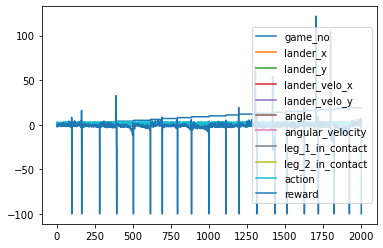

In [38]:
df.plot()

plt.show()

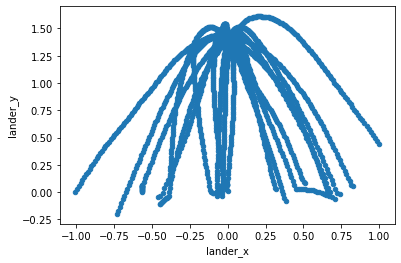

In [39]:
df.plot(kind = 'scatter', x = 'lander_x', y = 'lander_y')
plt.show()

In [40]:
# Get games that are going to 0.00 

df[df['reward']>10]

game_no  lander_x  lander_y  lander_velo_x  lander_velo_y     angle  \
162         1  0.374269 -0.052824       0.693256      -1.440924 -0.201437   
390         3 -0.019732  0.051186       0.642408      -0.852247 -1.466647   
1195       11  0.493202  0.117167       0.761522      -1.126508 -0.597781   
1305       12 -0.393411 -0.040722      -0.634225      -0.481387 -0.639867   
1311       12 -0.432163 -0.090250      -0.686347      -0.375151 -0.446795   
1313       12 -0.443972 -0.105535      -0.604596      -0.295035 -0.362157   
1418       13  0.458292  0.026393       1.081483      -0.391089 -1.170205   
1509       14 -0.371038  0.148117      -0.620629      -1.413075  0.394477   
1625       15 -0.108323  0.004049       0.659308      -1.057823 -1.387729   
1703       16 -0.564414  0.060556      -0.138299      -0.302889  0.519545   
1704       16 -0.564398  0.059137       0.012274      -0.063310  0.502457   
1799       17 -0.005658  0.062341      -0.123055      -0.319138  1.004847   

      angular_velocity  leg_1_in_contact  leg_2_in_contact  action  \
162          -0.002933               1.0               1.0       3   
390          -4.036817               1.0               0.0       2   
1195          0.113371               1.0               0.0       0   
1305         -1.612178               1.0               0.0       1   
1311          1.125788               1.0               1.0       0   
1313          0.708960               1.0               1.0       2   
1418         -2.134019               1.0               0.0       3   
1509         -0.034144               0.0               1.0       2   
1625         -4.397058               1.0               0.0       1   
1703          1.970362               0.0               1.0       0   
1704         -0.280577               0.0               1.0       2   
1799          2.362016               0.0               1.0       1   

          reward   done info  
162    16.118023  False   {}  
390    32.675563  False   {}  
1195   19.438200  False   {}  
1305   65.699471  False   {}  
1311   13.812607  False   {}  
1313   10.499196  False   {}  
1418   54.356855  False   {}  
1509   11.664057  False   {}  
1625   19.804162  False   {}  
1703  121.716475  False   {}  
1704   28.273347  False   {}  
1799  104.589993  False   {}

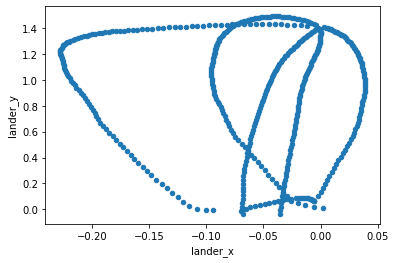

In [42]:
df[df['game_no'].isin([3,17,6,15,19])].plot(kind = 'scatter', x = 'lander_x', y = 'lander_y')

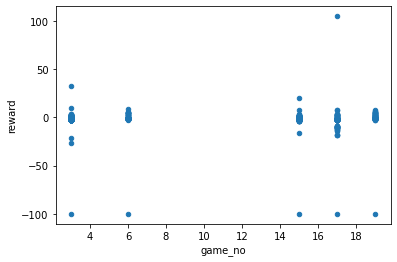

In [44]:
df[df['game_no'].isin([3,17,6,15,19])][['game_no','reward']].plot(kind = 'scatter', x = 'game_no', y = 'reward')

## Train NN using NEAT

In [18]:
%run neuroevolution-neat.py


 ****** Running generation 0 ****** 

Population's average fitness: 9.14800 stdev: 14.59939
Best fitness: 104.00000 - size: (4, 16) - species 2 - id 41
Average adjusted fitness: 0.114
Mean genetic distance 2.926, standard deviation 0.530
Population of 251 members in 7 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1    0    41      7.3    0.070     0
     2    0    20     10.3    0.099     0
     3    0    78     12.8    0.123     0
     4    0    19     10.9    0.105     0
     5    0    29      9.6    0.092     0
     6    0    50     20.2    0.195     0
     7    0    14       --       --     0
Total extinctions: 0
Generation time: 4.013 sec

 ****** Running generation 1 ****** 

Population's average fitness: 16.29880 stdev: 24.82212
Best fitness: 226.00000 - size: (4, 15) - species 1 - id 295
Average adjusted fitness: 0.076
Mean genetic distance 2.816, standard deviation 0.555
Population of 250 members in 7 species:
   ID   age  s

## Test model




In [120]:
import os
import pickle
import neat
import gym 
import numpy as np


with open('models/lunar-lander_model_3000ft', 'rb') as f:
    c = pickle.load(f)

local_dir = os.path.dirname(os.path.realpath('__file__'))
config_path = os.path.join(local_dir, 'neat_config')
config = neat.Config(neat.DefaultGenome, neat.DefaultReproduction,
                     neat.DefaultSpeciesSet, neat.DefaultStagnation,
                     config_path)
net = neat.nn.FeedForwardNetwork.create(c, config)


In [121]:
env = gym.make("LunarLander-v2", new_step_api=True)
env.action_space.seed(42)
observation = env.reset()
total_score = 0
fitness = 0
terminated = False

In [122]:
test_model_df = pd.DataFrame(columns=['action','reward'])

In [123]:
while not terminated:
    action = np.argmax(net.activate(observation))
    observation, reward, terminated, truncated, info = env.step(action)
    total_score += reward

    #Reconstruct reward as per fitness function
    if reward == 100:
        fitness += 200
    elif reward > 0:
        fitness += 1

    # Main engine
    if action == 2:
        # Penalize when using only
        reward -= 4
    
    test_model_df = test_model_df.append({ 'action': action,'reward' : reward},ignore_index=True)

    env.render()

env.close()

print("\n================================")
print("Fitness:")
print(fitness)
print("Total score:")
print(total_score)


Fitness:
439
Total score:
206.50203854291107


In [124]:
test_model_df

action        reward
0       0.0  1.978582e+00
1       0.0  2.036108e+00
2       0.0  1.951536e+00
3       0.0  1.750530e+00
4       0.0  1.333294e+00
..      ...           ...
453     0.0 -7.541925e-07
454     0.0 -4.088572e-07
455     0.0 -3.962176e-07
456     0.0 -3.238830e-07
457     0.0  1.000000e+02

[458 rows x 2 columns]